Lets Understand the given scenario and come up with business objective required for our analysis.

A consumer finance company(lending company) gives various types of loans. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.Company has the data of customers who has their loan approved.Where as the rejected applicant information is never stored in its Data base.

Now the company is providing us the data of their loans approved, It contains the complete loan data for all loans issued through the time period 2007 to 2011.

There are three categories this loans falls under

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan

Business Objective:

Lets analyse the data given and understand the driving factors behind a loan default. Finding out the variables which are strong indicators for a loan to default would help company in making a right descision at the time of loan application.

Because:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company.

If the applicant is not likely to repay the loan, where they are likely to default, then approving the loan may lead to a financial loss for the company.

The ultimate goal for any company is to be profitable and minimize the risk.So lets understand the already existing loan data and derive key factors contributing to loan default!!!!!.

In [ ]:
#user1 editing

In [2]:

# Importing files required for analysis

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt  
import seaborn as sns

import scipy as sp

import matplotlib as mpl

import seaborn as sns


pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)



# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

#/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47)
#have mixed types.Specify dtype option on import or set low_memory=False.
#  interactivity=interactivity, compiler=compiler, result=result)
#set low memory false

loan = pd.read_csv('loan.csv',encoding = "ISO-8859-1",low_memory=False)
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/18/11 > I am planning o...,debt_consolidation,Loan,280xx,NC,23.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/16/11 > Downpayment for...,car,Car Downpayment,900xx,CA,5.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I own a small h...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375

# Observations from loan file

In [3]:
print(loan.shape)
print(loan.columns)

(39717, 111)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [4]:
# Checking Null values in loan file
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### There are 39717 rows and 111 columns
### lets start to clean the Data and keep whatis required for our analysis

### When observing the  colunms of the data set there are lot of NAN .
### lets see how many colunms are having complete null values


In [5]:
missingvalues=round(100*(loan.isnull().sum()/len(loan.id)), 2)
print(missingvalues)


id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64


# Checking how many colunms are having  the 100% null values

In [6]:

columns_with_100_missingvalues = list(missingvalues[missingvalues == 100].index)

len(columns_with_100_missingvalues)

54

# There are 54 colunms with 100% null values lets remove them.

In [7]:

loan = loan.drop(columns_with_100_missingvalues,axis=1)
loan.shape


(39717, 57)

## That brings the colunms to 57 from 111
### Check for null values again

In [8]:
loan.isnull().sum()


id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                           ... 
acc_now_delinq                0
chargeoff_within_12_mths     56
delinq_amnt                   0
pub_rec_bankruptcies        697
tax_liens                    39
Length: 57, dtype: int64

### looks like we still have a few colunms having more Null values
### Checking the percentage of null values in each column

In [9]:
missingvalues=round(100*(loan.isnull().sum()/len(loan.id)), 2)
print(missingvalues)


id                          0.00
member_id                   0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
                            ... 
acc_now_delinq              0.00
chargeoff_within_12_mths    0.14
delinq_amnt                 0.00
pub_rec_bankruptcies        1.75
tax_liens                   0.10
Length: 57, dtype: float64


### lets drop the colunms next_pymnt_d  and mths_since_last_record as there are more than 90% values missing in them

In [10]:

loan=loan.drop(['mths_since_last_record','next_pymnt_d'], axis=1)
loan.shape

(39717, 55)

In [11]:
# Observations on lokan dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,...,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,...,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,...,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,...,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,...,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Some colunms have same unique value lets figure out those colunms.

### Let's print the colunms having the unique value colunms

In [12]:
uniquevaluecol=loan.nunique().sort_values()
print(uniquevaluecol)

tax_liens                       1
delinq_amnt                     1
chargeoff_within_12_mths        1
acc_now_delinq                  1
application_type                1
                            ...  
total_pymnt_inv             37518
total_pymnt                 37850
url                         39717
member_id                   39717
id                          39717
Length: 55, dtype: int64


### We have 55 colunms in the index now.
### Lets go one by one and learn the meaning from dictionary  to undertsand them better.
### below colunms are having unique values and looking upto their descriptions in dictonary they might not add much value to our analysis.
### tax_liens---Number of tax liens
### delinq_amnt--The past-due amount owed for the accounts on which the borrower is now delinquent.                    ### chargeoff_within_12_mths--Number of charge-offs within 12 months          
### acc_now_delinq--The number of accounts on which the borrower is now delinquent                    
### application_type--type of application                 
### policy_code--publicly available policy_code=1                       
### collections_12_mths_ex_med --Number of collections in 12 months excluding medical collections       
### initial_list_status--The initial listing status of the loan. Possible values are – W, F               
### pymnt_plan --   Indicates if a payment plan has been put in place for the loan

In [13]:
uniquevaluecol.loc[uniquevaluecol==1]
univalcolumns = list(uniquevaluecol[uniquevaluecol == 1].index)
print(univalcolumns)
len(univalcolumns)


['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan']


9

### Lets drop the 9 columns as they dont add much value for analysis.

In [14]:
loan = loan.drop(univalcolumns,axis=1)
loan.shape

(39717, 46)

### Now we have 46 columns in our dataframe

In [15]:
# Observations on the dataframe
loan.head(10)
loan.tail(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
39707,92666,92661,5000,5000,525.0,36 months,9.33%,159.77,B,B3,Stark and Roth Inc,2 years,MORTGAGE,180000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Need a loan to make some home improvments,home_improvement,home improvment loan,530xx,WI,11.93,0,Feb-95,1,0.0,16,0,60568,39.20%,38,0.0,0.0,5751.530533,603.91,5000.0,751.53,0.0,0.0,0.0,Jul-10,161.55,Jun-07,NaN
39708,92552,92542,5000,5000,375.0,36 months,9.96%,161.25,B,B5,Millenium Group,4 years,MORTGAGE,48000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,I would like to pay off my high-interest credi...,debt_consolidation,Tito5000,333xx,FL,8.03,0,Aug-95,1,0.0,6,0,28329,48.60%,6,0.0,0.0,5804.732505,435.36,5000.0,804.73,0.0,0.0,0.0,Jul-10,162.07,Jun-10,NaN
39709,92533,92529,5000,5000,675.0,36 months,11.22%,164.23,C,C4,Self-Employeed,< 1 year,OWN,80000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,P's Family Credit Loan,537xx,WI,1.21,0,Jul-96,3,0.0,15,1,27185,16.10%,29,0.0,0.0,5912.052998,798.13,5000.0,912.05,0.0,0.0,0.0,Jul-10,165.17,Jun-07,NaN
39710,92507,92502,5000,5000,250.0,36 months,7.43%,155.38,A,A2,Rush Univ Med Grp,1 year,OWN,85000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,My Credit Card Loan,537xx,WI,0.31,0,Oct-97,0,0.0,7,0,216,0.60%,19,0.0,0.0,5593.626092,279.68,5000.0,593.63,0.0,0.0,0.0,Jul-10,156.29,Jun-07,NaN
39711,92402,92390,5000,5000,700.0,36 months,8.70%,158.30,B,B1,"A. F. Wolfers, Inc.",5 years,MORTGAGE,75000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,I'd like to shift some credit card debt so it ...,credit_card,Reduce Credit Card Debt,804xx,CO,15.55,0,May-94,0,0.0,10,0,66033,23%,29,0.0,0.0,5698.603286,797.80,5000.0,698.60,0.0,0.0,0.0,Jul-10,159.83,Nov-14,NaN
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,13,0,7274,13.10%,40,0.0,0.0,2822.969293,1213.88,2500.0,322.97,0.0,0.0,0.0,Jul-10,80.90,Jun-10,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,6,0,8847,26.90%,9,0.0,0.0,9913.491822,1020.51,8500.0,1413.49,0.0,0.0,0.0,Jul-10,281.94,Jul-10,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,11,0,9698,19.40%,20,0.0,0.0,5272.161128,1397.12,5000.0,272.16,0.0,0.0,0.0,Apr-08,0.00,Jun-07,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,17,0,85607,0.70%,26,0.0,0.0,5174.198551,672.66,5000.0,174.20,0.0,0.0,0.0,Jan-08,0.00,Jun-07,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,Evergreen Center,< 1 year,OWN,22000.0,Not Ve

### lets examine in dictionary data set
### what is id and member id? A unique LC assigned ID for the loan listing.A unique LC assigned Id for the borrower member.
### grade and subgrade? LC assigned loan grade.LC assigned loan subgrade
### pub_rec_bankruptcies mostly zeros and NAN.Number of public record bankruptcies

## drop id and member id.

In [16]:
loan=loan.drop(['id','member_id'],axis=1)
print(loan.shape)

(39717, 44)


### out of all this  funded_amnt funded_amnt_inv loan_amnt values
### we learned only funded_amnt_inv is the amount  the borrowers get.

### lets drop the  other values

In [17]:
loan.funded_amnt_inv.isnull().sum()
loan=loan.drop(['loan_amnt','funded_amnt'],axis=1)
print(loan.shape)


(39717, 42)


In [18]:
loan.columns

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')

### Lets check what is 'url', 'desc' from dictionary file

In [19]:
print(loan.desc.isnull().sum())
print(loan.url.isnull().sum())
print(loan.purpose.isnull().sum())

12940
0
0


### There is no need to have the desc colunm as desc and purpose are same.and purpose has no null values
### Lets drop desc and url aswell.

In [20]:
loan=loan.drop(['url','desc'],axis=1)
loan.shape

(39717, 40)

### zipcode--doesnt have full values-not needed
### total_rec_int--recover int defauly happened.
### total_rec_late_fee--default happened
### recoveries--post charge off recovery not needed.charge off already happened.
### collection_recovery_fee-default happened
### title-- is not required as its a kind of description for loan need
### emp_title -- is not needed as its no way related to loan

## lets remove them

In [21]:
loan=loan.drop(['emp_title','zip_code','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','title'],axis=1)
loan.shape

(39717, 33)

### Now we have 33 columns in the dataframe

In [22]:
# Observations on the dataframe
loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,Jan-15,171.62,May-16,0.0
1,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,Apr-13,119.66,Sep-13,0.0
2,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,Jun-14,649.91,May-16,0.0
3,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,Jan-15,357.48,Apr-16,0.0
4,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,May-16,67.79,May-16,0.0


In [23]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   funded_amnt_inv         39717 non-null  float64
 1   term                    39717 non-null  object 
 2   int_rate                39717 non-null  object 
 3   installment             39717 non-null  float64
 4   grade                   39717 non-null  object 
 5   sub_grade               39717 non-null  object 
 6   emp_length              38642 non-null  object 
 7   home_ownership          39717 non-null  object 
 8   annual_inc              39717 non-null  float64
 9   verification_status     39717 non-null  object 
 10  issue_d                 39717 non-null  object 
 11  loan_status             39717 non-null  object 
 12  purpose                 39717 non-null  object 
 13  addr_state              39717 non-null  object 
 14  dti                     39717 non-null

### Now we are left with 33 colunms for analysis

In [24]:
print(loan.columns)
print(loan.shape)

Index(['funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'pub_rec_bankruptcies'],
      dtype='object')
(39717, 33)


## revol_util and int_rate column is having % lets check the object type of the column and remove the % from value

In [25]:
print(loan.int_rate.describe())
print(loan.revol_util.describe())

loan['int_rate'] = loan['int_rate'].str.strip('%')
loan['revol_util'] = loan['revol_util'].str.strip('%')
loan.head()

loan['int_rate'] = loan['int_rate'].astype('float')
loan['revol_util'] = loan['revol_util'].astype('float')


count      39717
unique       371
top       10.99%
freq         956
Name: int_rate, dtype: object
count     39667
unique     1089
top          0%
freq        977
Name: revol_util, dtype: object


### There are few columns which denote date or month information but are of the type object in the dataframe. 
### These columns are:

In [26]:
print(loan.issue_d.describe())
print(loan.earliest_cr_line.describe())
print(loan.last_pymnt_d.describe())
print(loan.last_credit_pull_d.describe())


count      39717
unique        55
top       Dec-11
freq        2260
Name: issue_d, dtype: object
count      39717
unique       526
top       Nov-98
freq         370
Name: earliest_cr_line, dtype: object
count      39646
unique       101
top       May-16
freq        1256
Name: last_pymnt_d, dtype: object
count      39715
unique       106
top       May-16
freq       10308
Name: last_credit_pull_d, dtype: object


### Let's change the dtype of all such columns to datetime. best for analysis.

In [27]:
# Importing datetime for changing the datetime from object

import datetime

loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')
loan.last_pymnt_d = pd.to_datetime(loan.last_pymnt_d, format='%b-%y')
loan.last_credit_pull_d = pd.to_datetime(loan.last_credit_pull_d, format='%b-%y')

In [28]:
print(loan.issue_d.describe())
print(loan.earliest_cr_line.describe())
print(loan.last_pymnt_d.describe())
print(loan.last_credit_pull_d.describe())

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_d, dtype: object
count                   39717
unique                    526
top       1998-11-01 00:00:00
freq                      370
first     1969-02-01 00:00:00
last      2068-12-01 00:00:00
Name: earliest_cr_line, dtype: object
count                   39646
unique                    101
top       2016-05-01 00:00:00
freq                     1256
first     2008-01-01 00:00:00
last      2016-05-01 00:00:00
Name: last_pymnt_d, dtype: object
count                   39715
unique                    106
top       2016-05-01 00:00:00
freq                    10308
first     2007-05-01 00:00:00
last      2016-05-01 00:00:00
Name: last_credit_pull_d, dtype: object


### deleting months suffix from term column

In [29]:

loan['term'] = loan['term'].str.split(r' ').str.get(1)



In [30]:

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   funded_amnt_inv         39717 non-null  float64       
 1   term                    39717 non-null  object        
 2   int_rate                39717 non-null  float64       
 3   installment             39717 non-null  float64       
 4   grade                   39717 non-null  object        
 5   sub_grade               39717 non-null  object        
 6   emp_length              38642 non-null  object        
 7   home_ownership          39717 non-null  object        
 8   annual_inc              39717 non-null  float64       
 9   verification_status     39717 non-null  object        
 10  issue_d                 39717 non-null  datetime64[ns]
 11  loan_status             39717 non-null  object        
 12  purpose                 39717 non-null  object

In [31]:
# Changing the type of term column
loan['term'] = loan['term'].astype(int)

In [32]:
loan.head()

,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985-01-01,1,NaN,3,0,13648,83.7,9,0.00,0.00,5863.155187,5833.84,5000.00,2015-01-01,171.62,2016-05-01,0.0
1,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,1999-04-01,5,NaN,3,0,1687,9.4,4,0.00,0.00,1008.710000,1008.71,456.46,2013-04-01,119.66,2013-09-01,0.0
2,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001-11-01,2,NaN,2,0,2956,98.5,10,0.00,0.00,3005.666844,3005.67,2400.00,2014-06-01,649.91,2016-05-01,0.0
3,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996-02-01,1,35.0,10,0,5598,21.0,37,0.00,0.00,12231.890000,12231.89,10000.00,2015-01-01,357.48,2016-04-01,0.0
4,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,1996-01-01,0,38.0,15,0,27783,53.9,38,524.06,524.06,3513.330000,3513.33,2475.94,2016-05-01,67.79,2016-05-01,0.0


In [33]:
#lets take the year and strip off remaining from earliest cr line
loan['earliest_cr_line']=loan['earliest_cr_line'].dt.year

In [34]:
loan.earliest_cr_line.value_counts()
#20XX 2061 2056 2046 2050 2059 values abnormal


2000    3250
1999    2968
1998    2851
2001    2521
1997    2456
        ... 
2061       2
2056       1
2046       1
2050       1
2059       1
Name: earliest_cr_line, Length: 53, dtype: int64

### From the forum discusion we found out that years below 69 would be extracts as 20xx's ex:68 would be 2068.
### Its a limitation so lets convert the years below 69 to 19XX
### As observed from year in earliest_cr_line column 2011 is the highest year in this column
### If any year is higher than 2008 subtract 100 from that

In [35]:

loan['earliest_cr_line']=loan['earliest_cr_line'].apply(lambda x:x-100 if x>2011 else x )

In [36]:
loan.earliest_cr_line.value_counts()

2000    3250
1999    2968
1998    2851
2001    2521
1997    2456
        ... 
1954       2
1959       1
1946       1
1956       1
1950       1
Name: earliest_cr_line, Length: 53, dtype: int64

In [37]:

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   funded_amnt_inv         39717 non-null  float64       
 1   term                    39717 non-null  int64         
 2   int_rate                39717 non-null  float64       
 3   installment             39717 non-null  float64       
 4   grade                   39717 non-null  object        
 5   sub_grade               39717 non-null  object        
 6   emp_length              38642 non-null  object        
 7   home_ownership          39717 non-null  object        
 8   annual_inc              39717 non-null  float64       
 9   verification_status     39717 non-null  object        
 10  issue_d                 39717 non-null  datetime64[ns]
 11  loan_status             39717 non-null  object        
 12  purpose                 39717 non-null  object

## exporting to csv for observations to check everything done correctly or not

In [38]:

loan.to_csv('newloan.csv', encoding='utf-8')

# Work experience length with their employer

In [39]:
loan.emp_length.value_counts()


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

## As employee lenght or work experience plays a major role in analysis let convert them 0 to 10 which would be
## helpul for  analysis

In [40]:


emplen_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

## map it to the emp_lenght

In [41]:
loan = loan.replace({"emp_length": emplen_dict })


In [42]:
loan.term.value_counts()

36    29096
60    10621
Name: term, dtype: int64

# Lets Start Analysing Data Now

## Lets drop the current loan status from the data set 
## it would be easy for us as we are analysing the patterns of defaulted with fully paid

In [43]:


master = loan.loc[(loan['loan_status']=='Fully Paid')|(loan['loan_status']=='Charged Off')]
master.loan_status.value_counts()




Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [44]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   funded_amnt_inv         38577 non-null  float64       
 1   term                    38577 non-null  int64         
 2   int_rate                38577 non-null  float64       
 3   installment             38577 non-null  float64       
 4   grade                   38577 non-null  object        
 5   sub_grade               38577 non-null  object        
 6   emp_length              37544 non-null  float64       
 7   home_ownership          38577 non-null  object        
 8   annual_inc              38577 non-null  float64       
 9   verification_status     38577 non-null  object        
 10  issue_d                 38577 non-null  datetime64[ns]
 11  loan_status             38577 non-null  object        
 12  purpose                 38577 non-null  object

## lets examine rate of default

In [45]:

master.loan_status.value_counts()     
defaultrate=5627/38577*100
# default rate= charged off/total number
print("deafault rate=",defaultrate)

deafault rate= 14.586411592399617


## lets compare this in a bar plot

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

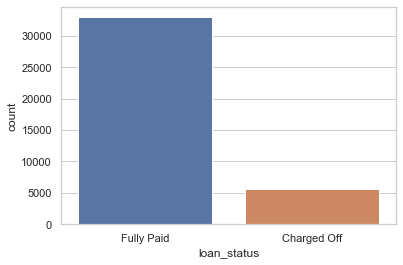

In [46]:

sns.countplot(master['loan_status'])
master['loan_status'].value_counts()

# Univariate 

## lets take only defaulters and perform analysis
## lets take paid members data set and compare with defaulters

In [47]:

default=loan.loc[(loan['loan_status']=='Charged Off')]
default.head()


paid=loan.loc[(loan['loan_status']=='Fully Paid')]
paid.head()


,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1985,1,NaN,3,0,13648,83.7,9,0.0,0.0,5863.155187,5833.84,5000.00,2015-01-01,171.62,2016-05-01,0.0
2,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2001,2,NaN,2,0,2956,98.5,10,0.0,0.0,3005.666844,3005.67,2400.00,2014-06-01,649.91,2016-05-01,0.0
3,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1996,1,35.0,10,0,5598,21.0,37,0.0,0.0,12231.890000,12231.89,10000.00,2015-01-01,357.48,2016-04-01,0.0
5,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,2004,3,NaN,9,0,7963,28.3,12,0.0,0.0,5632.210000,5632.21,5000.00,2015-01-01,161.03,2016-01-01,0.0
6,7000.0,60,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,2005,1,NaN,7,0,17726,85.6,11,0.0,0.0,10110.840000,10110.84,6985.61,2016-05-01,1313.76,2016-05-01,0.0


RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64

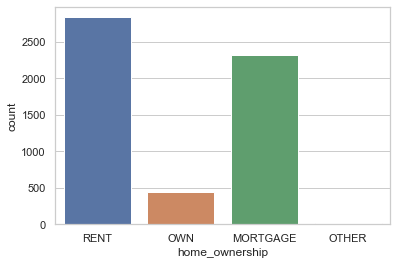

In [48]:
sns.countplot(default['home_ownership'])
default['home_ownership'].value_counts()





## Most defaulters come from the RENT category of home_ownership followed by mortgage

B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64

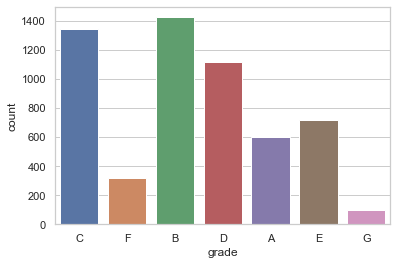

In [49]:
sns.countplot(default['grade'])
default['grade'].value_counts()



## Most defaulters come from Grade B followed by C and D

debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: purpose, dtype: int64

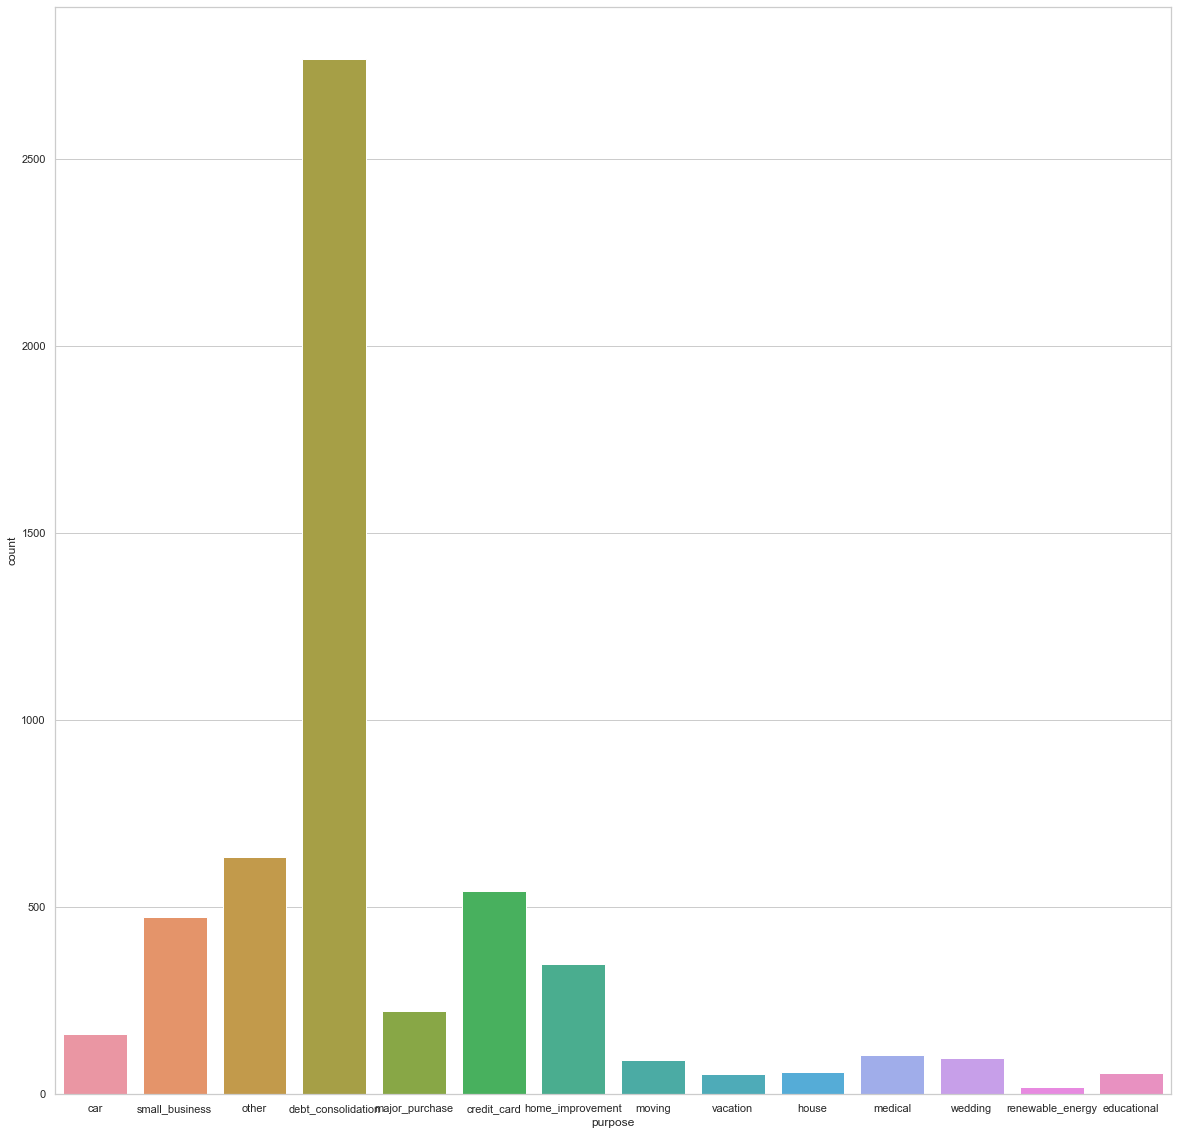

In [50]:
#purpose
plt.figure(figsize=(20, 20))
sns.countplot(default['purpose'])
default['purpose'].value_counts()


debt_consolidation    15288
credit_card            4485
other                  3232
home_improvement       2528
major_purchase         1928
car                    1339
small_business         1279
wedding                 830
medical                 575
moving                  484
vacation                322
house                   308
educational             269
renewable_energy         83
Name: purpose, dtype: int64

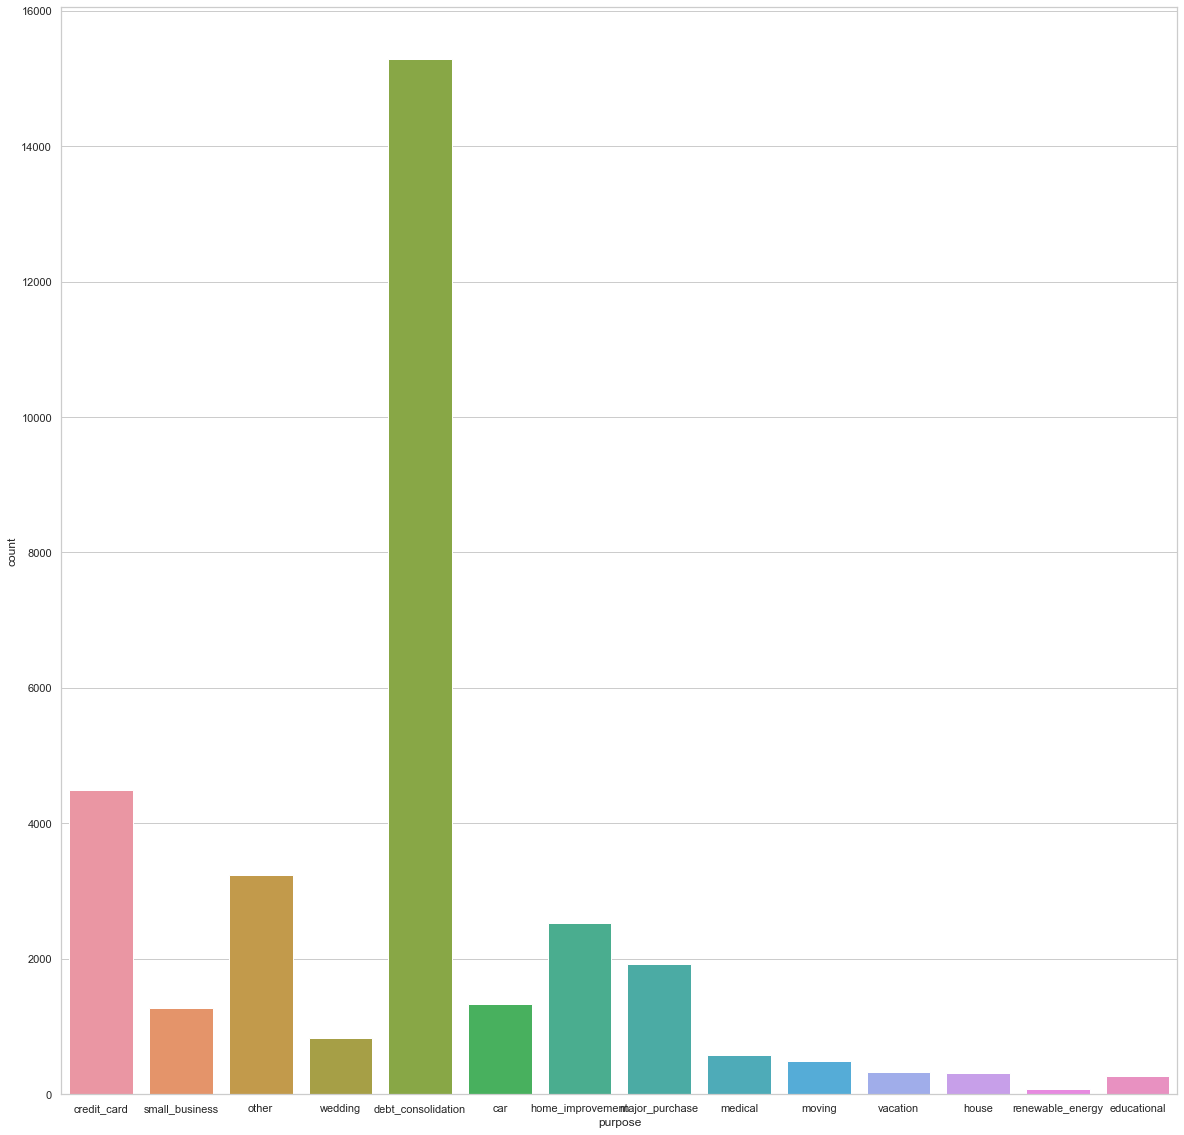

In [51]:
#purpose
plt.figure(figsize=(20, 20))
sns.countplot(paid['purpose'])
paid['purpose'].value_counts()


## Purpose stated for most defaulters is Debt-consolidation its the same for full paid mebers as well.
## Theres is no much deriving factors


10.0    1331
0.0      639
2.0      567
3.0      555
4.0      462
5.0      458
1.0      456
6.0      307
7.0      263
8.0      203
9.0      158
Name: emp_length, dtype: int64

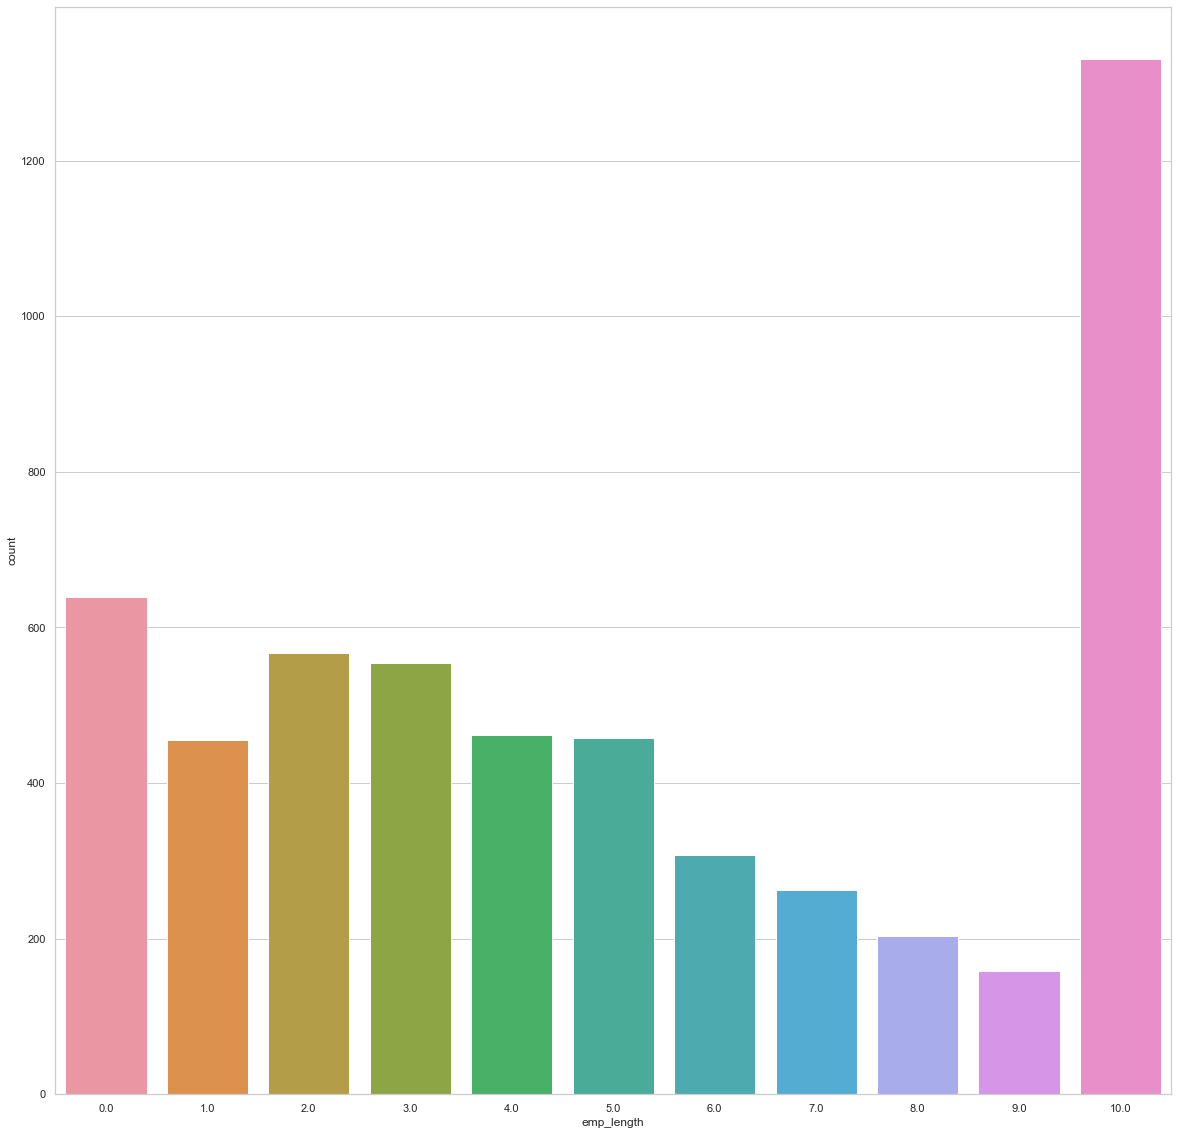

In [52]:
plt.figure(figsize=(20, 20))
sns.countplot(default['emp_length'])
default['emp_length'].value_counts()

10.0    7157
0.0     3869
2.0     3724
3.0     3457
4.0     2880
5.0     2736
1.0     2713
6.0     1861
7.0     1448
8.0     1232
9.0     1068
Name: emp_length, dtype: int64

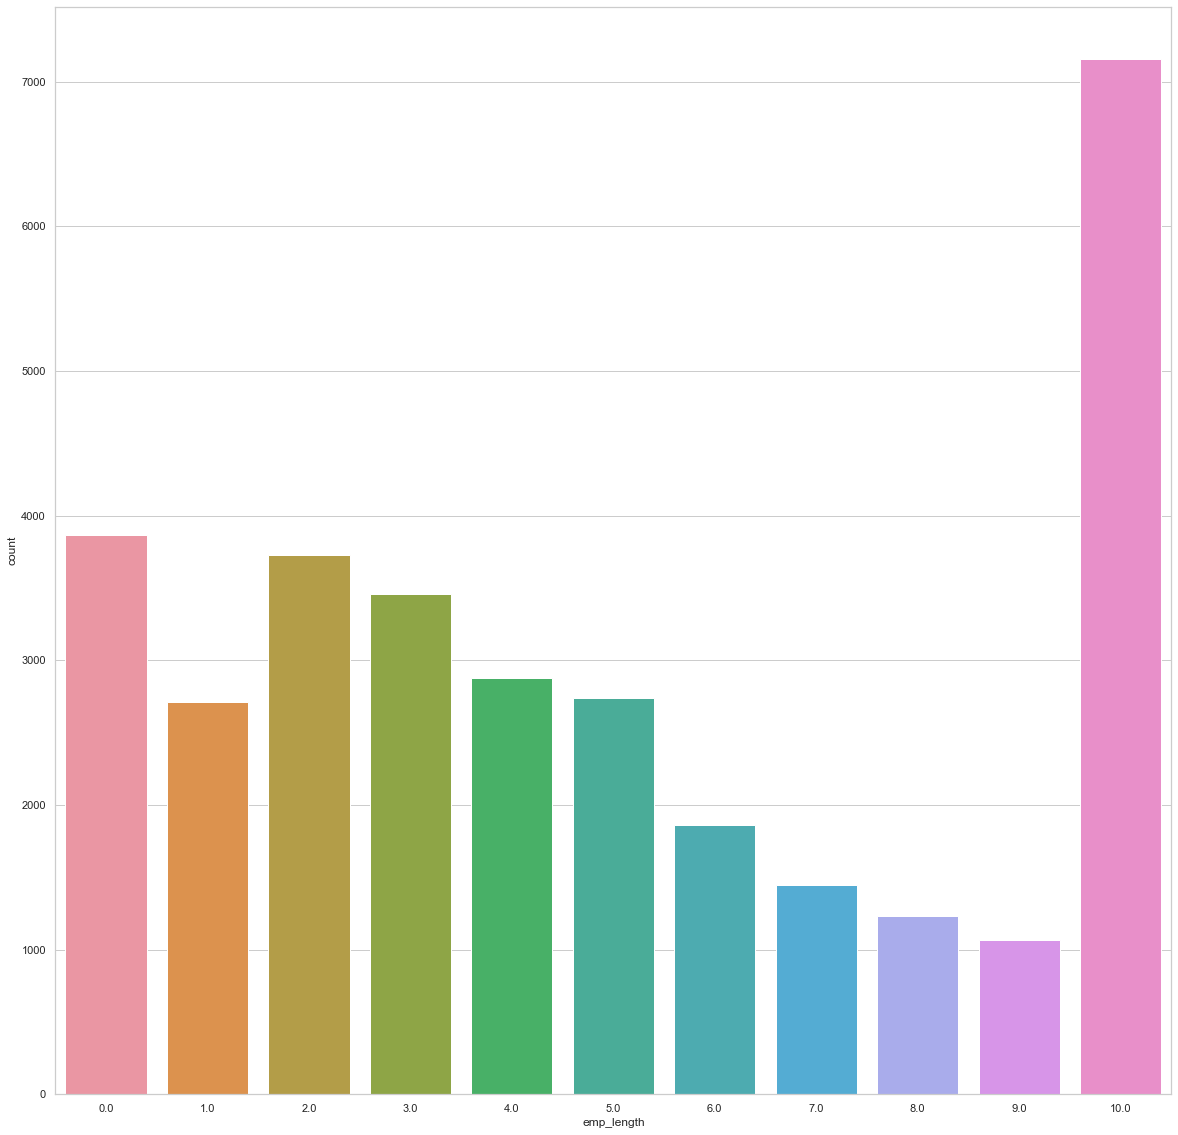

In [53]:
plt.figure(figsize=(20, 20))
sns.countplot(paid['emp_length'])
paid['emp_length'].value_counts()

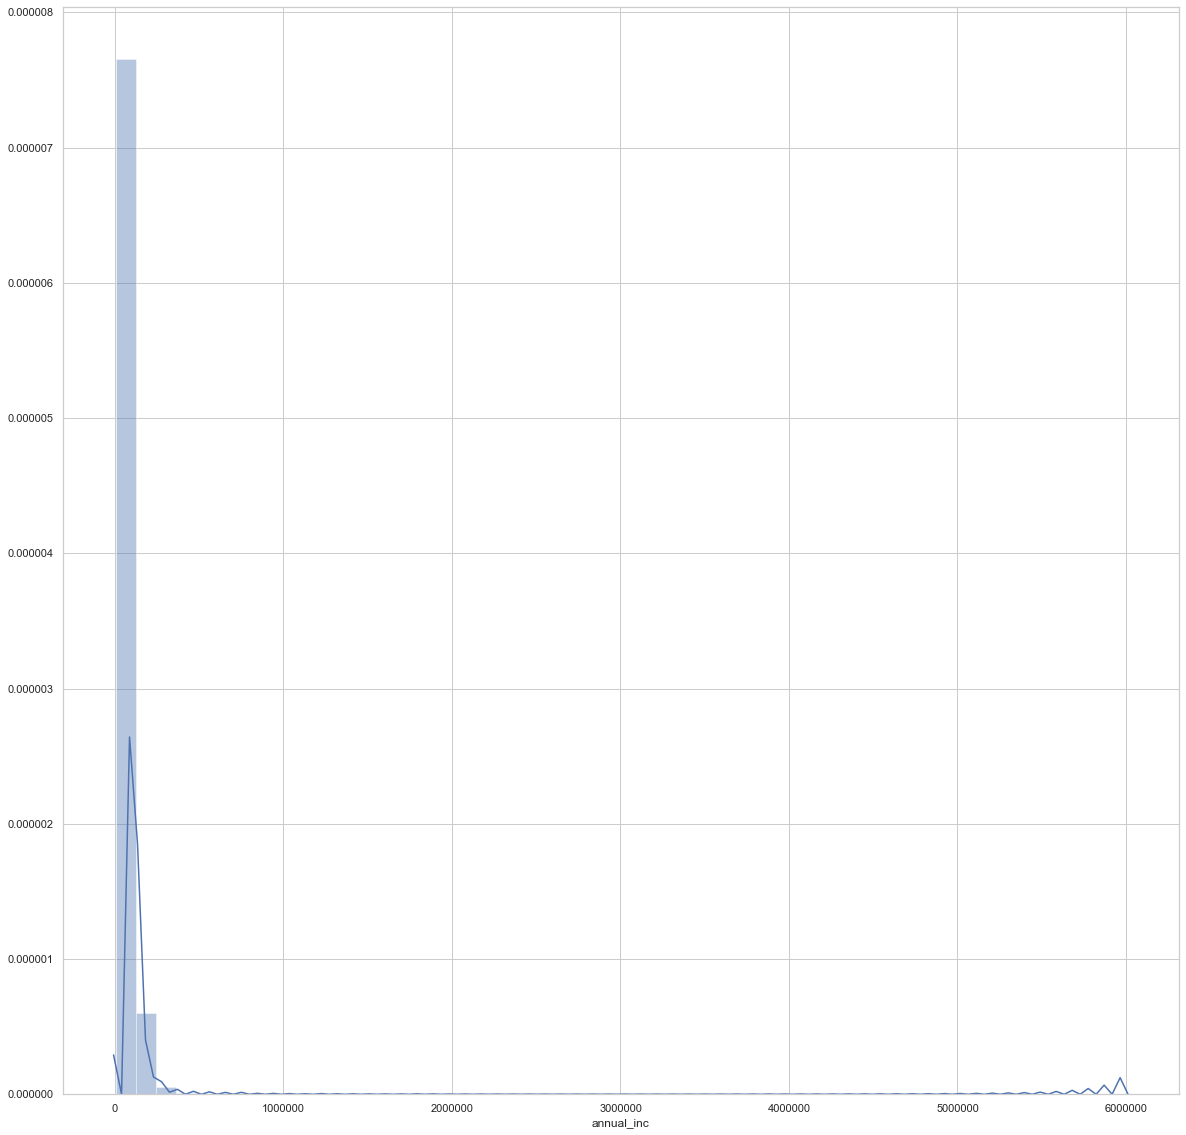

In [54]:
plt.figure(figsize=(20, 20))
sns.distplot(paid['annual_inc'])

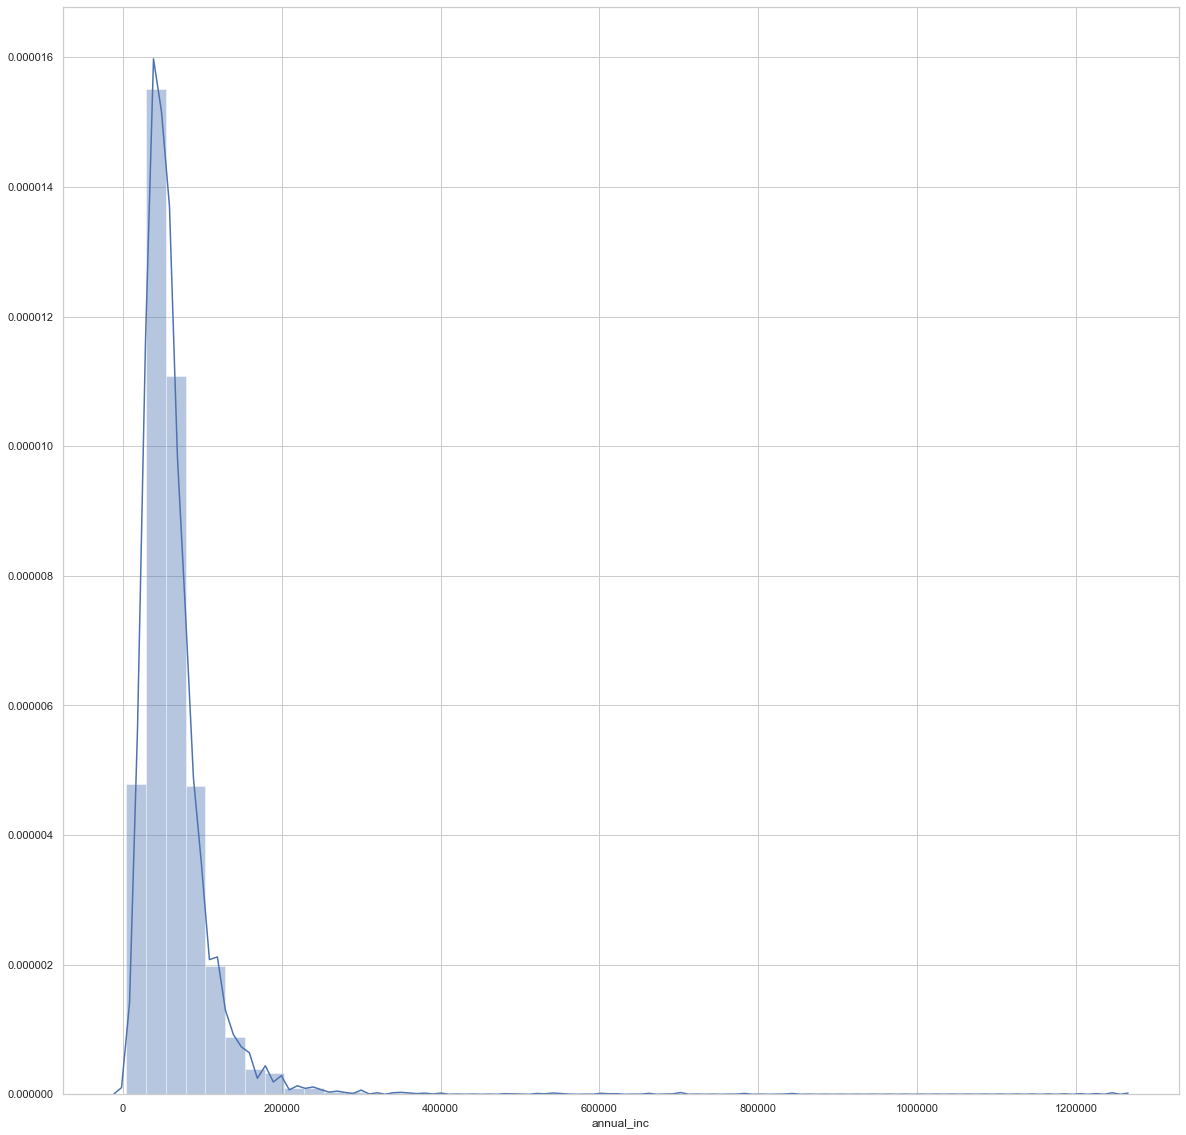

In [55]:
plt.figure(figsize=(20, 20))
sns.distplot(default['annual_inc'])

## The annual income falls under same normal distrubution curve between for paid and defaulters

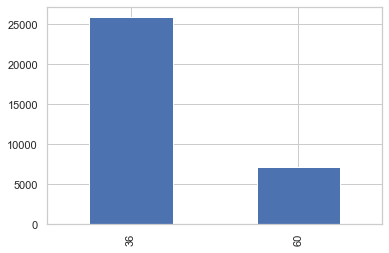

In [56]:

paid['term'].value_counts().plot(kind='bar');



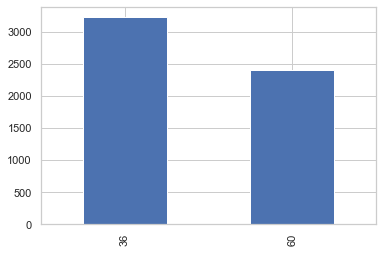

In [57]:
default['term'].value_counts().plot(kind='bar');

## defaulters have more percentage of 60 month term loans compared to paid borrowers

# Bivariate analysis

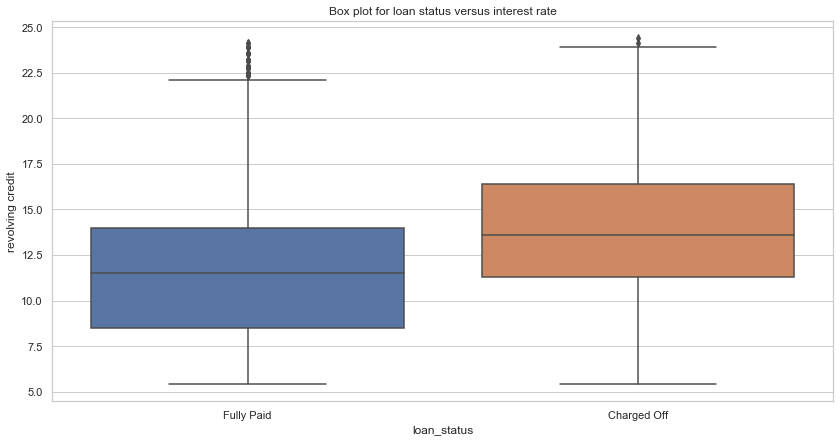

In [58]:
#comparing the interest rates between 
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y='int_rate', x='loan_status', data=master)
plt.title('Box plot for loan status versus interest rate')
plt.ylabel('revolving credit')
plt.show()


## Defaulters have the highest interest rate compared to the paid borrowers

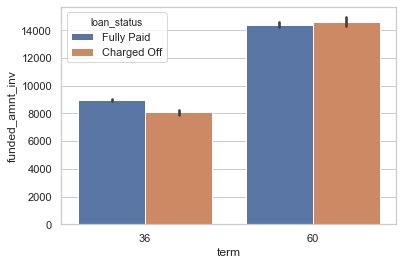

In [59]:
sns.barplot(x='term', y='funded_amnt_inv', hue="loan_status", data=master, estimator=np.mean)
plt.show()




## Observations  made during univariate analysis is more evident with this plot. Higher loan amount are associated with longer terms and see higher Charge Offs.

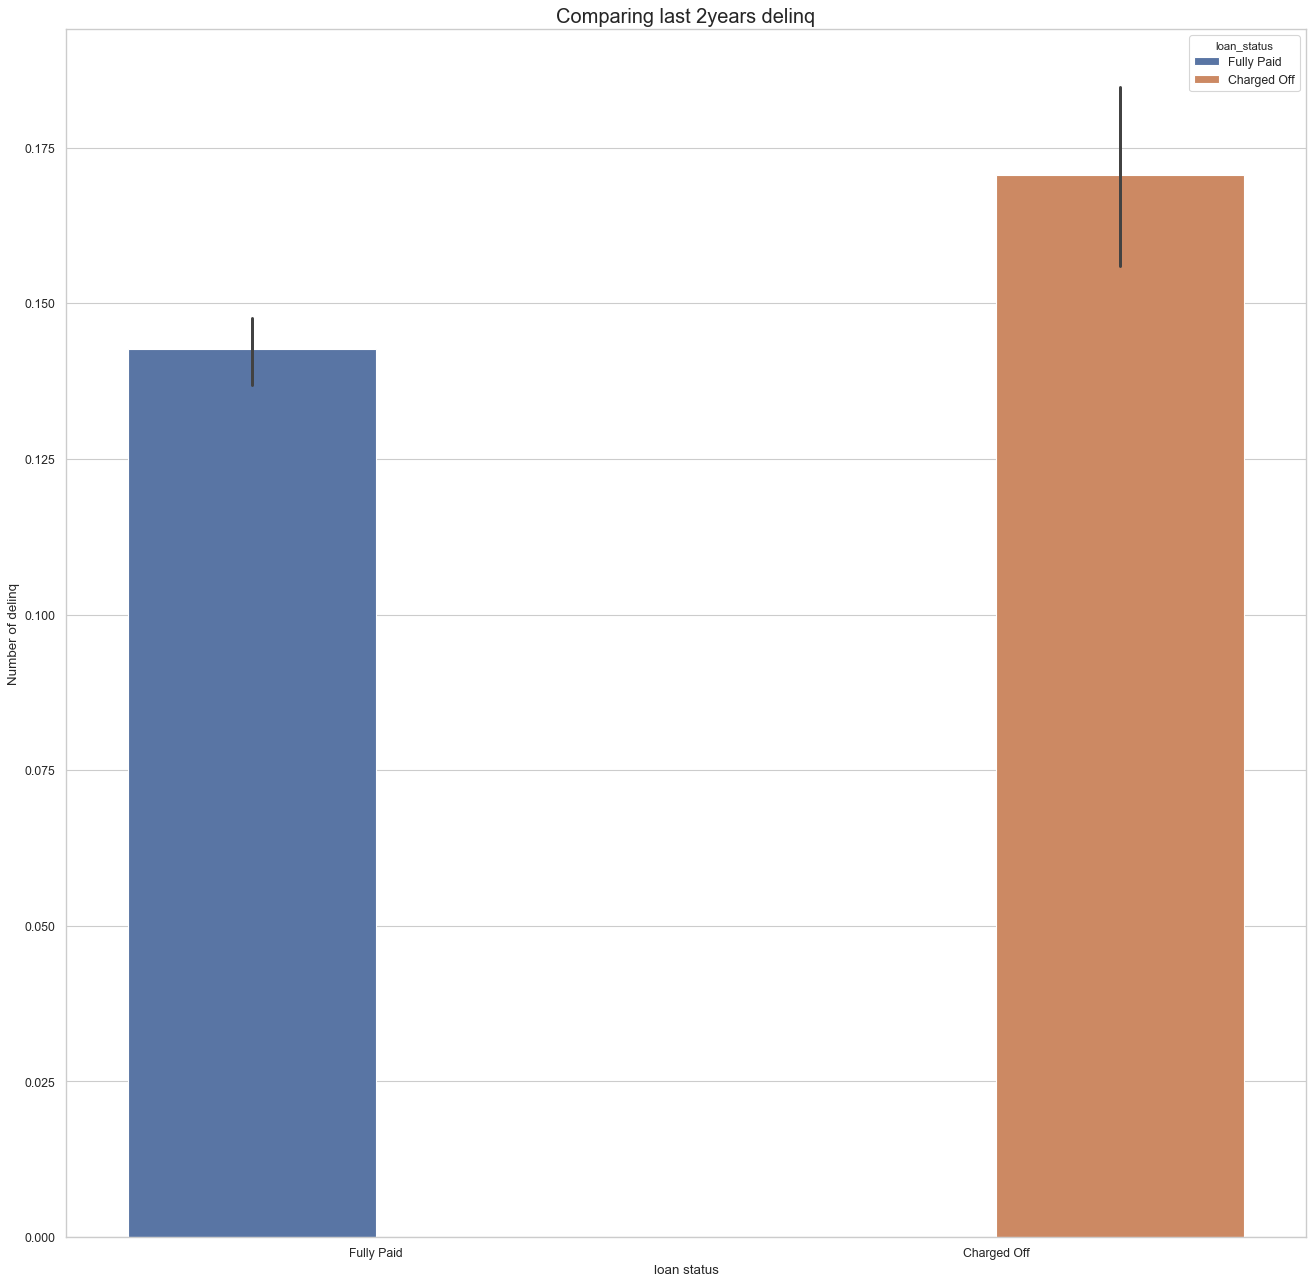

In [60]:
# set figure size for larger figure
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='loan_status', y='delinq_2yrs', hue="loan_status", data=master,)
s.set(xlabel='loan status', ylabel='Number of delinq')
s.set_title('Comparing last 2years delinq',fontsize =18)
plt.show()

## Defaulters have high missed payments compared to paid borrowers.

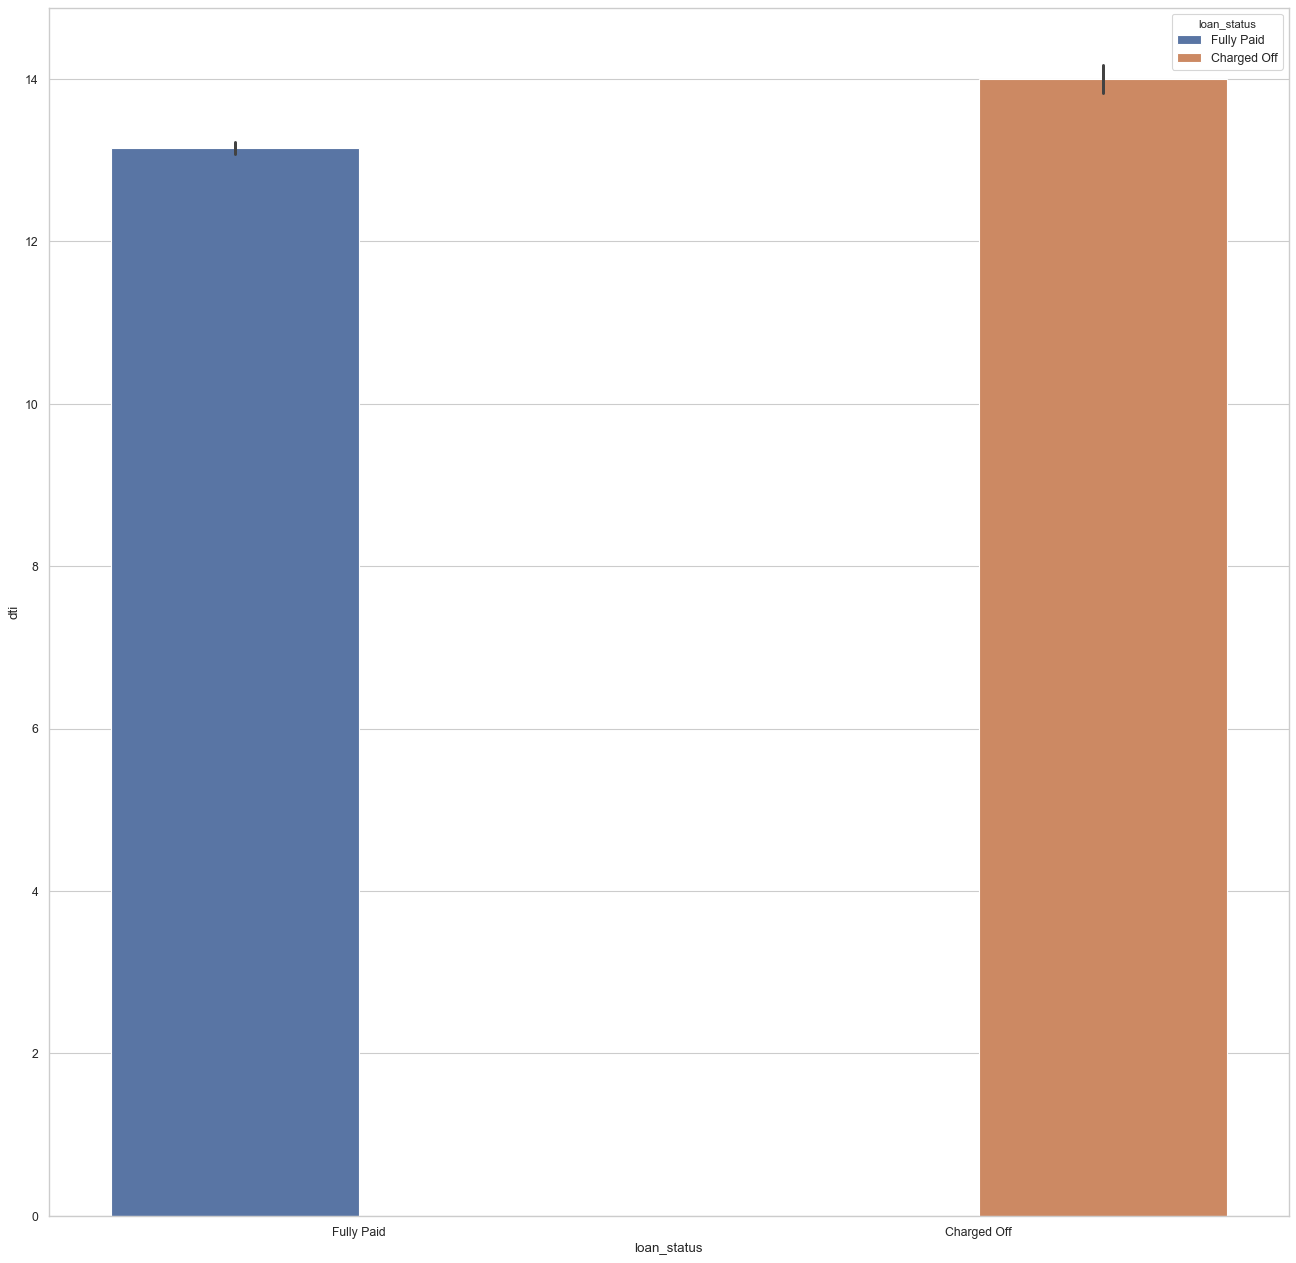

In [61]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='loan_status', y='dti', hue="loan_status", data=master,)

## Higher the DTI higher the chances for charge off

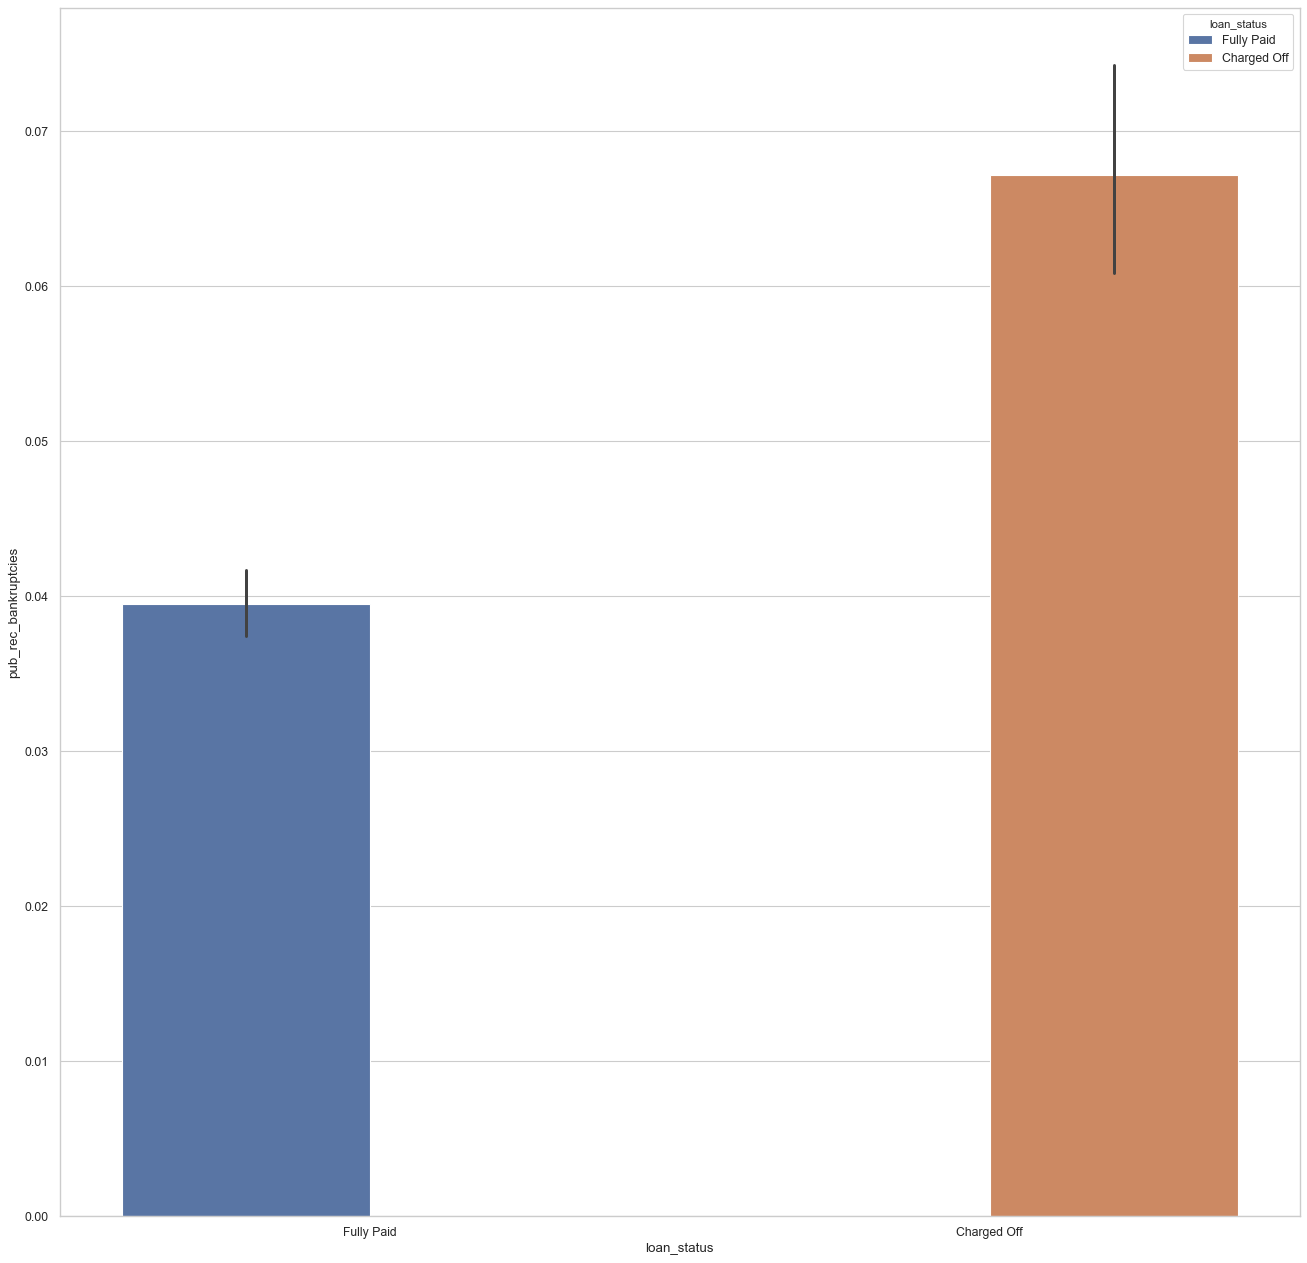

In [62]:
plt.figure(num=None, figsize=(20, 20), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='loan_status', y='pub_rec_bankruptcies', hue="loan_status", data=master,)
#we can say that people with a record of bankruptcies are likely to default.

## public bankrup records are having much charge offs

In [63]:
paid.head()
loan.term.describe()

count    39717.000000
mean        42.418007
std         10.622815
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

loan_status       charged_off_percentage  fully_paid_percentage
earliest_cr_line                                               
1946                                0.00                 100.00
1950                                0.00                 100.00
1954                                0.00                 100.00
1956                                0.00                 100.00
1959                                0.00                 100.00
...                                  ...                    ...
2004                               13.26                  86.74
2005                               16.29                  83.71
2006                               19.41                  80.59
2007                               20.63                  79.37
2008                               18.30                  81.70

[53 rows x 2 columns]


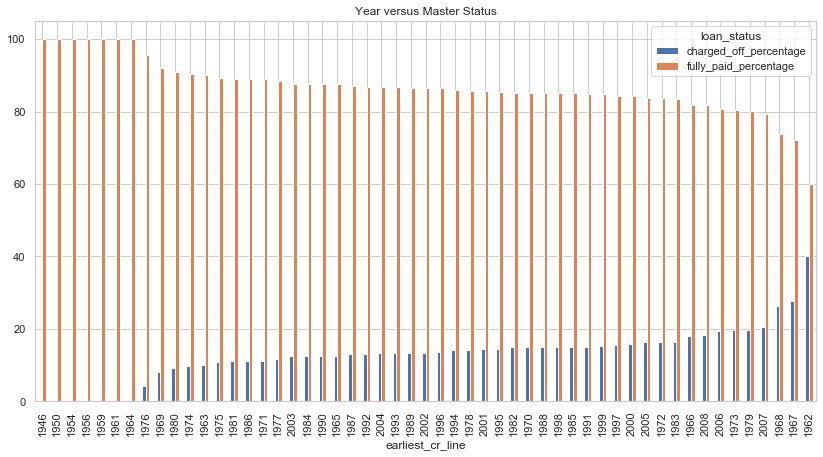

In [64]:
################# Bivariate analysis on loan status and early credit year

master_crosstab = pd.crosstab(master['earliest_cr_line'], master['loan_status'])
master_crosstab['sum_of_charged_off_and_fully_paid'] = master_crosstab['Charged Off'] + master_crosstab['Fully Paid']

### calculating percentages 
master_crosstab['charged_off_percentage'] = round((master_crosstab['Charged Off']/master_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)
master_crosstab['fully_paid_percentage'] = round((master_crosstab['Fully Paid']/master_crosstab.sum_of_charged_off_and_fully_paid)*100, 2)

######## dropping unnecessary columns in contingency table
master_crosstab.drop(columns=['Charged Off', 'Fully Paid', 'sum_of_charged_off_and_fully_paid'], inplace=True)
print(master_crosstab)

master_crosstab.sort_values(by='charged_off_percentage').plot.bar(stacked=False, figsize=(14,7),  title='Year versus Master Status')


## There is some significance that people having longer credit line are more reliable.

CA    1125
FL     504
NY     495
TX     316
NJ     278
GA     215
IL     197
PA     180
VA     177
MD     162
MA     159
OH     155
WA     127
AZ     123
MO     114
NC     114
NV     108
MI     103
CO      98
CT      94
MN      81
OR      71
SC      66
WI      63
AL      54
LA      53
KY      45
OK      40
UT      40
KS      31
NM      30
HI      28
AR      27
RI      25
NH      25
WV      21
AK      15
DC      15
DE      12
SD      12
MT      11
VT       6
WY       4
NE       3
MS       2
TN       2
ID       1
Name: addr_state, dtype: int64

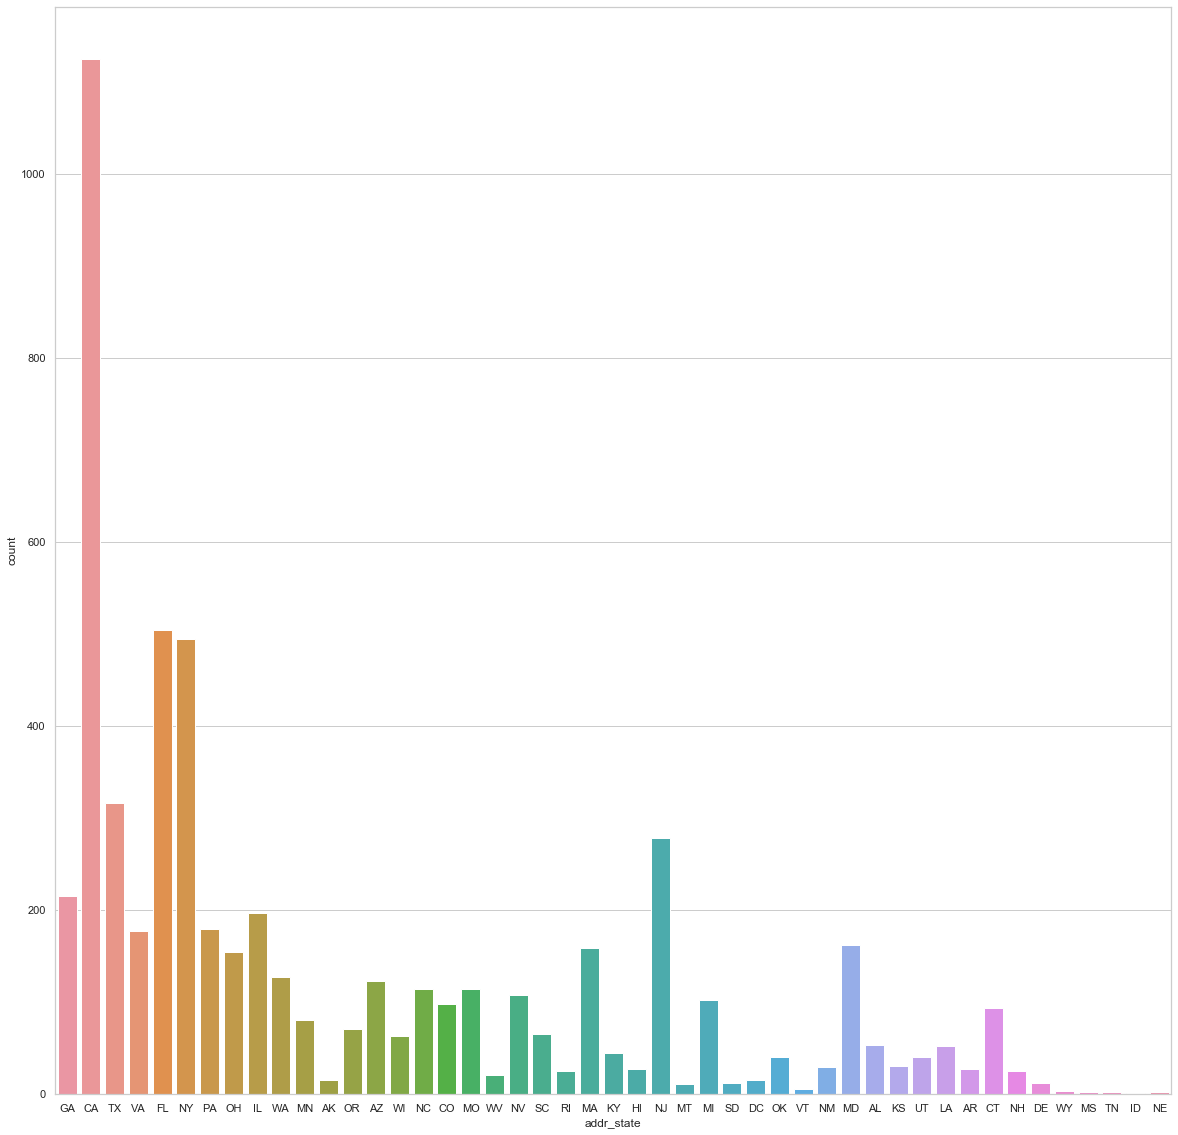

In [65]:
plt.figure(figsize=(20, 20))
sns.countplot(default['addr_state'])
default['addr_state'].value_counts()

## CA    FL  NY     are states most defaulters come from lenders should look into that

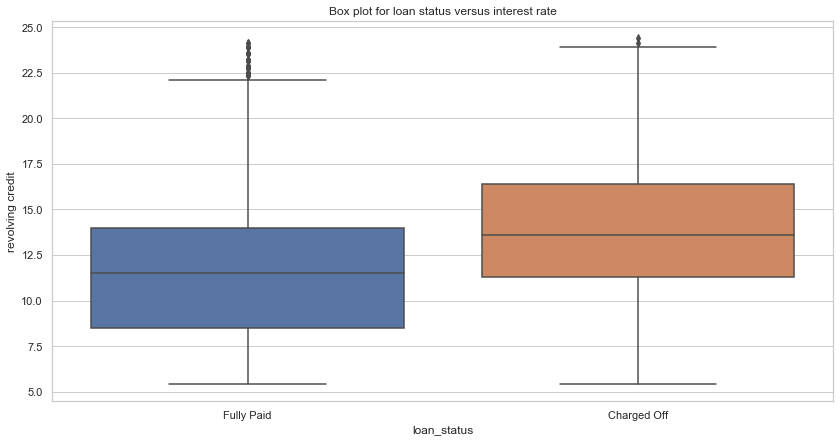

In [66]:
#comparing the interest rates between 
fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y='int_rate', x='loan_status', data=master)
plt.title('Box plot for loan status versus interest rate')
plt.ylabel('revolving credit')
plt.show()



## We can see from the above plot that higher the interest rate, higher the chances of loan getting charged off

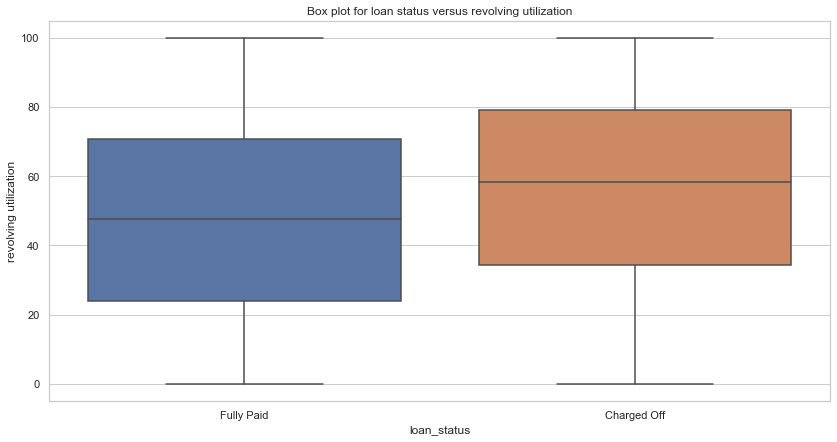

In [67]:

fig, ax = plt.subplots()
fig.set_size_inches(14, 7)
sns.boxplot(y='revol_util', x='loan_status', data=master)
plt.title('Box plot for loan status versus revolving utilization')
plt.ylabel('revolving utilization')
plt.show()

## we could see that charged off people has highest credit utilization

## below lets observe the correlation with a heat map to check for significant factors of defaulters

In [68]:
heat=default[['funded_amnt_inv','term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc' , 'issue_d', 'purpose','addr_state','dti', 'delinq_2yrs' ,'earliest_cr_line','revol_util','pub_rec_bankruptcies']]

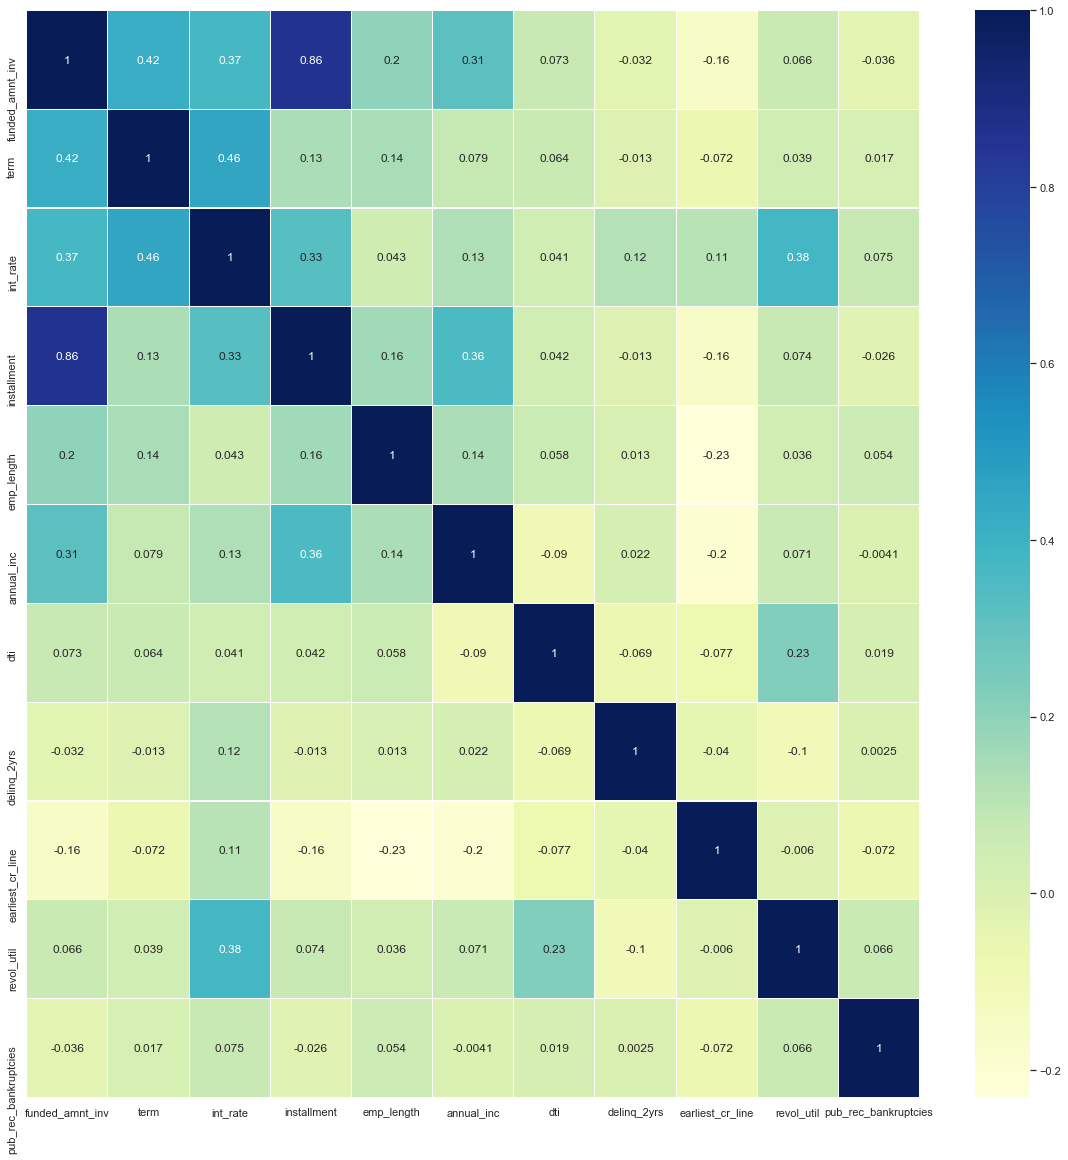

In [69]:
heat_correlation_matrix = heat.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(heat_correlation_matrix, ax = ax, cmap ="YlGnBu",annot=True, linewidths = 0.1) 
plt.show()

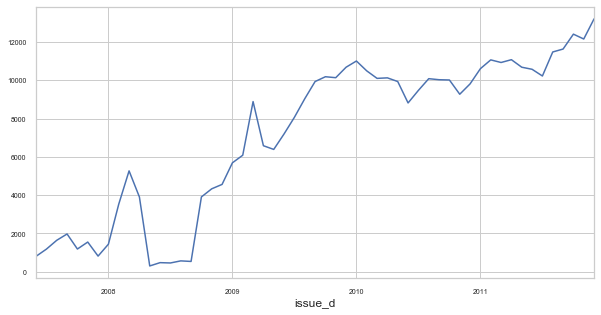

In [70]:

plt.figure(figsize=(10,5))
master.groupby('issue_d').funded_amnt_inv.mean().plot(kind='line', fontsize=7)
plt.show()

## borrowing was pretty low during 2008 and 2009 due to recession

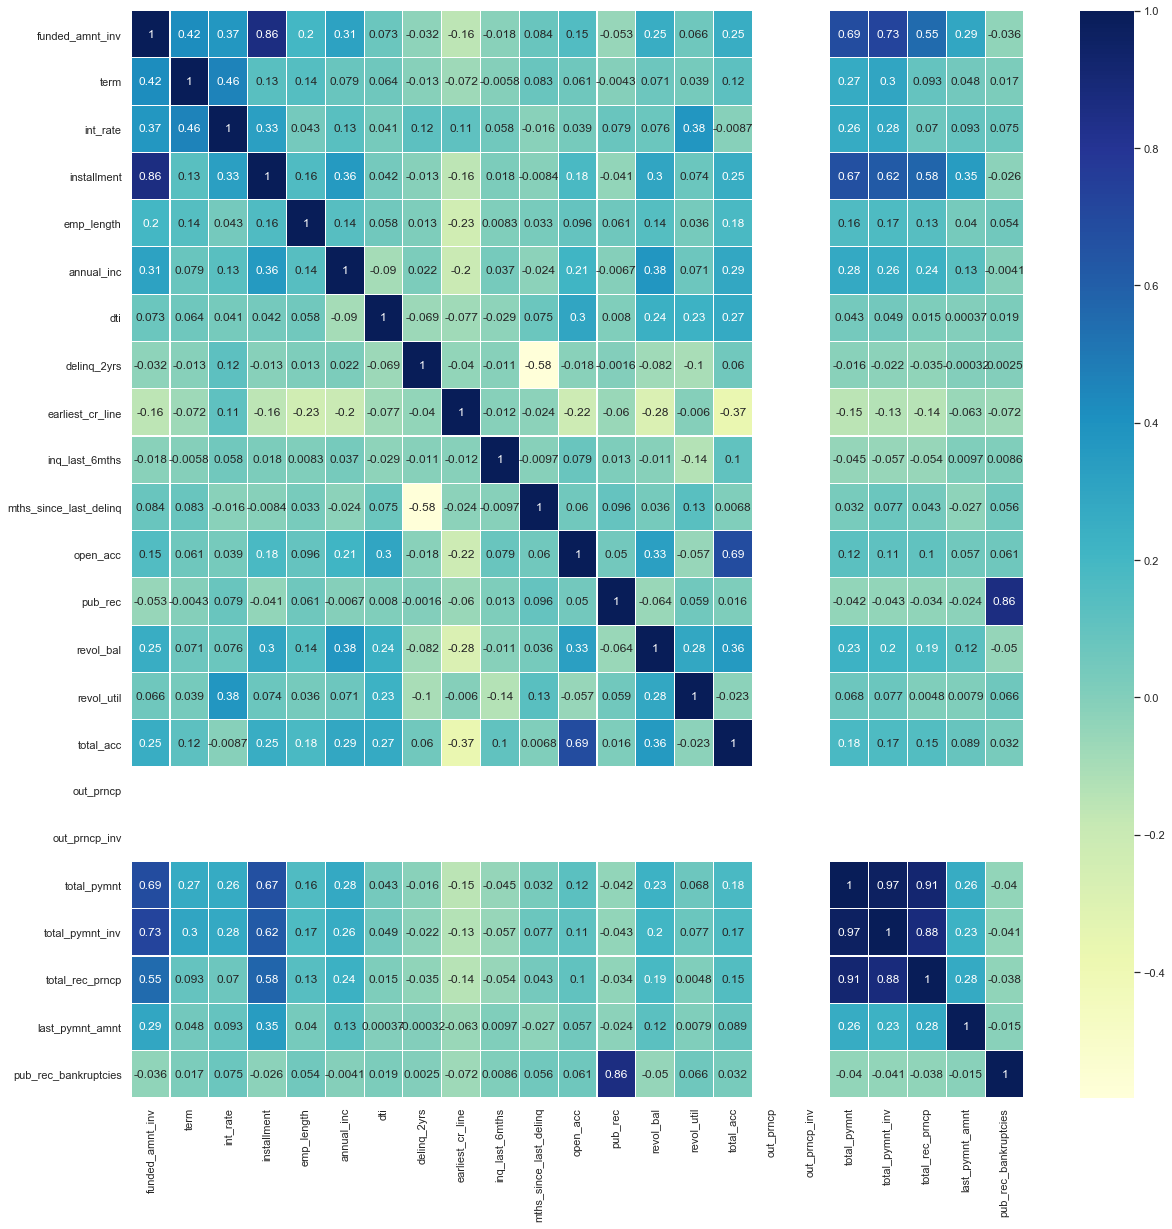

In [71]:
default_correlation_matrix = default.corr()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
sns.heatmap(default_correlation_matrix, ax = ax, cmap ="YlGnBu",annot=True, linewidths = 0.1) 
plt.show()


## There is no significant correlation from this heat map.¶